# Build a Linear Regression Model
***

## Background:
*Dataset from an ecomerce company wanting to know if they should focus their attention on other market areas.*


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Explore data

In [3]:
customer_data = pd.read_csv("Ecommerce Customers")

In [4]:
customer_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [6]:
customer_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## EDA

In [7]:
sns.set_palette("hls")
sns.set_style('whitegrid')

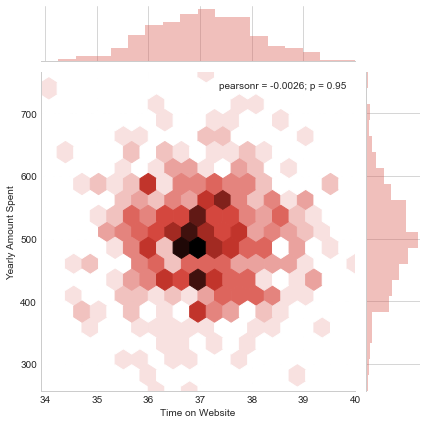

In [8]:
# Create some jointplots looking at the relaionship of several attributes
sns.jointplot(data=customer_data,
              x='Time on Website',y='Yearly Amount Spent',kind='hex')

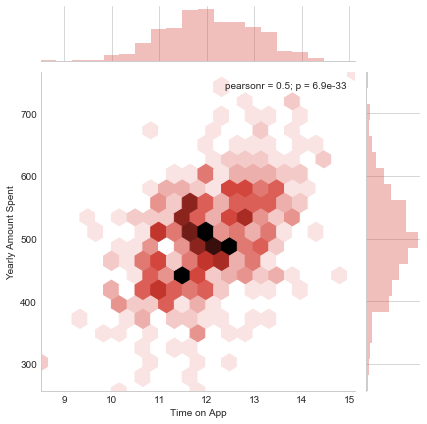

In [9]:
# There is a little more of a linear relationship here than the previous chart
sns.jointplot(data=customer_data,
              x='Time on App',y='Yearly Amount Spent',kind='hex')

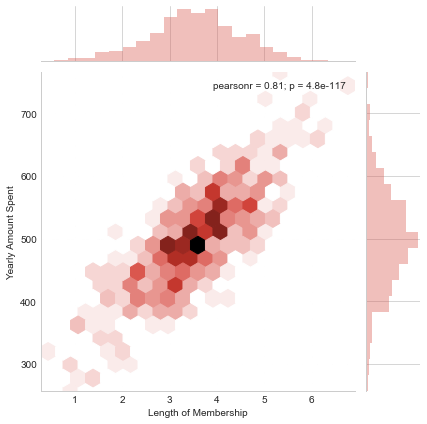

In [10]:
# This might be the strongest relationship.
sns.jointplot(data=customer_data,
              x='Length of Membership',y='Yearly Amount Spent',kind='hex')

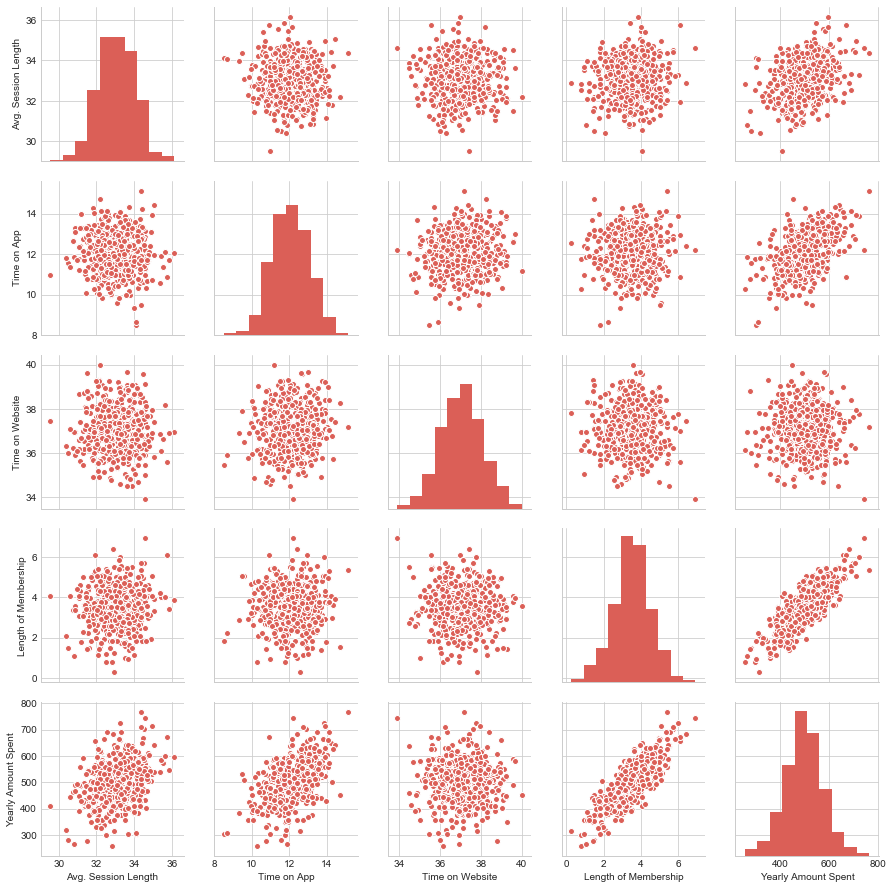

In [11]:
# Lets take a look at all the attributes in a pairplot
sns.pairplot(customer_data)

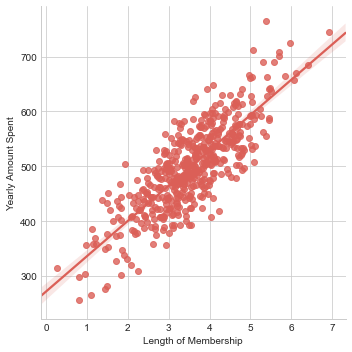

In [12]:
# Taking the strongest relationship and running a regression
sns.lmplot(data=customer_data,x='Length of Membership',y='Yearly Amount Spent')

## Training the Model

In [13]:
# Our target variable
y = customer_data['Yearly Amount Spent']

In [14]:
# Features
X = customer_data.drop(['Yearly Amount Spent',
                        'Email','Address','Avatar'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Split our dataset into Training and Test
X_train, X_test, y_train, y_test = train_test_split(X, 
                    y, test_size=0.3, random_state=123)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Build the regression model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Make our predictions
predict = model.predict(X_test)

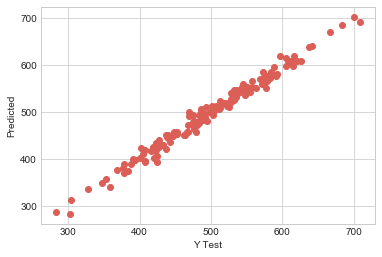

In [20]:
# Now create a chart to visualize the predictions
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted')

## Evaluate the Model

In [21]:
# Lets print out some metrics to further evaluate the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 7.98807919425
MSE: 102.723139419
RMSE: 10.135242445


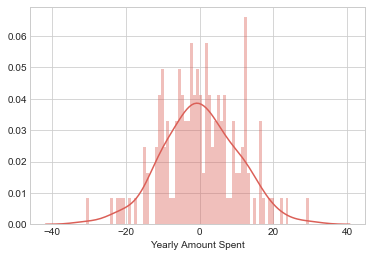

In [22]:
# Now take a look and chart the residuals
sns.distplot((y_test-predict),bins=75)

In [23]:
# Calculate the coefficients
coef = pd.DataFrame(model.coef_,X.columns)
coef.columns = ['Coefficient']
coef

,Coefficient
Avg. Session Length,25.362665
Time on App,38.823679
Time on Website,0.803568
Length of Membership,61.549053


** The Coefficients show the result of changes to any of the included attributes**